In [ ]:
install.packages("WallomicsData")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("BiocParallel")

BiocManager::install('mixOmics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband', 'jsonlite',
  'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass', 'stringr',
  'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite', 'vroom', 'waldo',
  'whisker', 'xfun', 'xml2', 'zip', 'boot', 'class', 'foreign', 'KernSmooth',
  'MASS', 'nnet'

'getOption("repos")'

In [ ]:
# Charger les packages

library(mixOmics)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.24.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [ ]:
install.packages("WallomicsData")
library(WallomicsData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [ ]:
library("matrixStats")

In [ ]:

data("Altitude_Cluster")
data("Ecotype")
data("Genetic_Cluster")
data("Metabolomics_Rosettes")
data("Metabolomics_Stems")
data("Metadata")
data("Phenomics_Rosettes")
data("Phenomics_Stems")
data("Proteomics_Rosettes_CW")
data("Proteomics_Stems_CW")
data("Transcriptomics_Rosettes")
data("Transcriptomics_Rosettes_CW")
data("Transcriptomics_Stems")
data("Transcriptomics_Stems_CW")
data("Temperature")

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Stems)){Metabolomics_Stems[,i][is.na(Metabolomics_Stems[,i])]<-median(Metabolomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Stems)){Phenomics_Stems[,i][is.na(Phenomics_Stems[,i])]<-median(Phenomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Stems_CW)){Proteomics_Stems_CW[,i][is.na(Proteomics_Stems_CW[,i])]<-median(Proteomics_Stems_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems)){Transcriptomics_Stems[,i][is.na(Transcriptomics_Stems[,i])]<-median(Transcriptomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems_CW)){Transcriptomics_Stems_CW[,i][is.na(Transcriptomics_Stems_CW[,i])]<-median(Transcriptomics_Stems_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Stems)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Stems <- Transcriptomics_Stems[,-which(colnames(Transcriptomics_Stems)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

we can not integrate the OMICs data sets since Proteomics_Rosettes_CW and Transcriptomics_Rosettes and Transcriptomics_Rosettes_CW data are high-dimensional so we need to perform a feature selection for those two OMICs. Here we use LASSO for doing feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

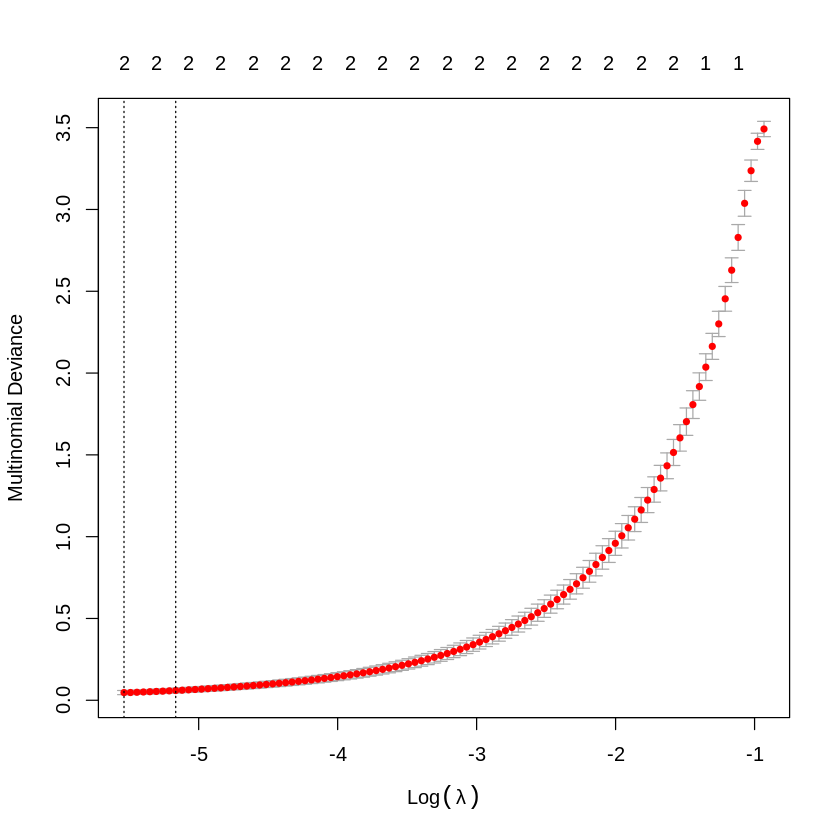

In [ ]:
#Proteomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Stems_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Stems_CW)[unlist(coef)]
Proteomics_Stems_CW<-subset(Proteomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

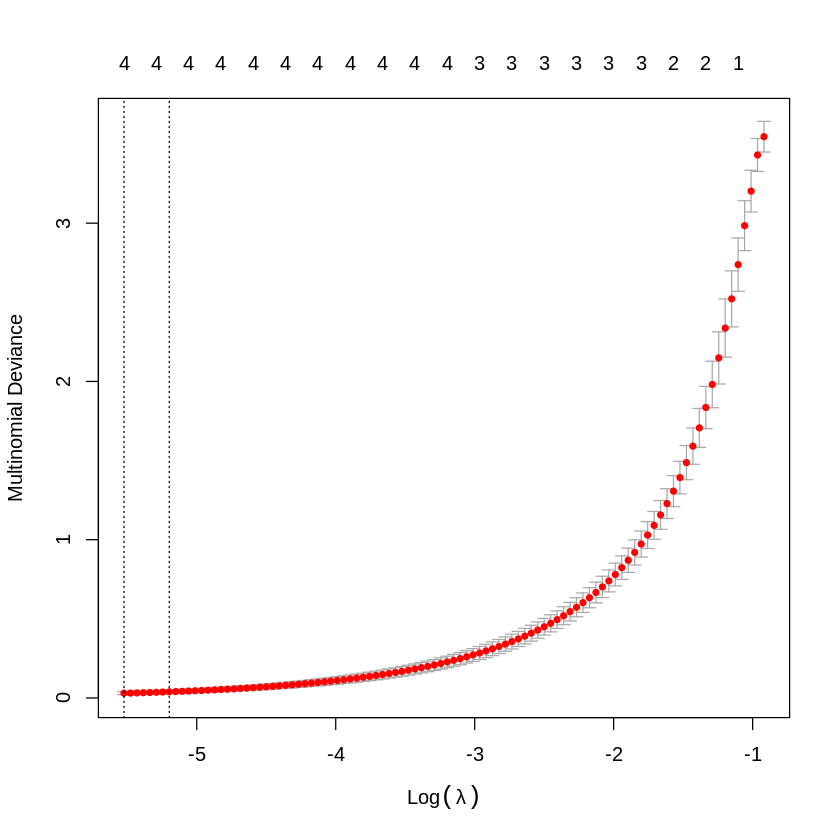

In [ ]:
#Transcriptomics_Stems
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems)[unlist(coef)]
Transcriptomics_Stems<-subset(Transcriptomics_Stems, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

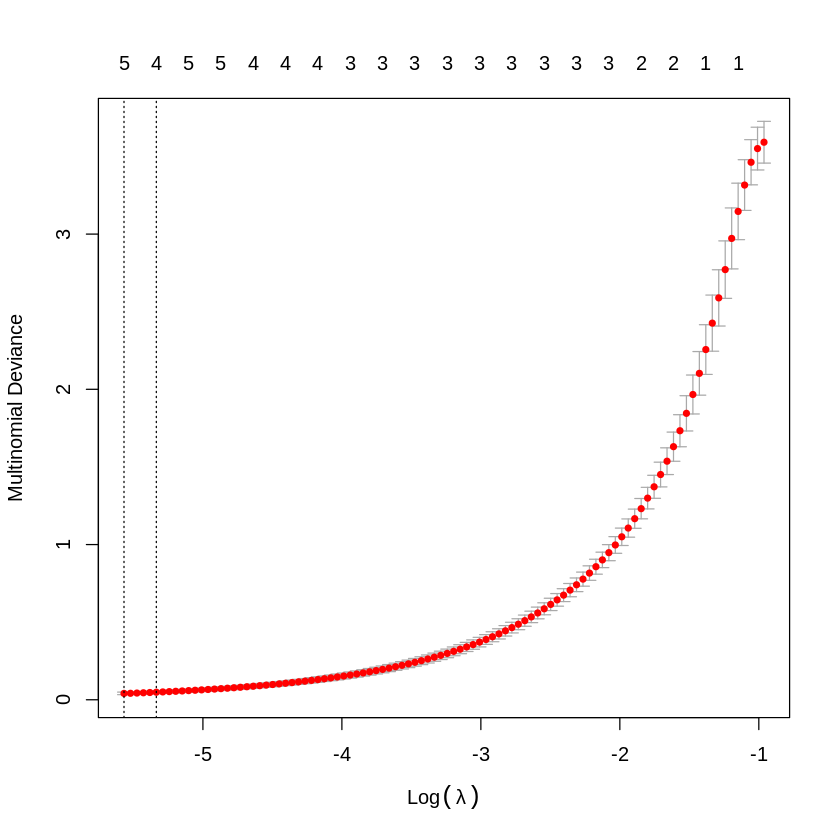

In [ ]:
#Transcriptomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems_CW)[unlist(coef)]
Transcriptomics_Stems_CW<-subset(Transcriptomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Stems_CW)
dim(Transcriptomics_Stems)
dim(Proteomics_Stems_CW)

[1] 30 24

[1] 30 23

[1] 30 14

We can see that we dramatically decreased the number of dimensions / features in the chosen  data sets. Now we can proceed with OMICs integration via PLS-DA algorithm (DIABLO).

###OMICS INTEGRATION ANALYSIS


We can see that we dramatically decreased the number of dimensions / features in the chosen  data sets. Now we can proceed with OMICs integration via PLS-DA algorithm (DIABLO).

Now we will start integrating the 5 OMICs. 

For this purpose we will concatenate them into X matrix and use the ECOTYPE as Y variable, so it is a typical Machine Learning setup: y=f(x), where x is the input, y is the class labels of individuals and the f-function is learnt from the data. Note that the f-function is a-priori linear for PLS-DA and non-linear.

In [ ]:
data<-list(Proteomics_CW=Proteomics_Stems_CW,Transcriptomics=Transcriptomics_Stems,Transcriptomics_CW=Transcriptomics_Stems_CW,Phenomics=Phenomics_Stems,Metabolomics=Metabolomics_Stems)
names(data)
lapply(data, dim) 

[1] "Proteomics_CW"      "Transcriptomics"    "Transcriptomics_CW"
[4] "Phenomics"          "Metabolomics"

$Proteomics_CW
[1] 30 14

$Transcriptomics
[1] 30 23

$Transcriptomics_CW
[1] 30 24

$Phenomics
[1] 30  4

$Metabolomics
[1] 30  6

First, we fit a DIABLO model without variable selection to assess the global performance and choose the number of components for the final DIABLO model. The function “perf” will perform M-fold cross validation (number of folds is specified by “folds” parameter) repeated “nrepeat” times. The design matrix sets expected correlation between the OMICs. The values may range between 0 (no correlation) to 1 (strong correlation), the design can be chosen based on prior knowledge inferred by e.g. MOFA (see Unsupervised OMICs integration session). Here due to the lack of prior knowledge we assume a strong correlation 1 between the OMICs.

The choice of the design can be motivated by different aspects, including:

Biological apriori knowledge: Should we expect mRNA and miRNA to be highly correlated?

Analytical aims: As further developed in Singh et al. (2019), a compromise needs to be achieved between a classification and prediction task, and extracting the correlation structure of the data sets. A full design with weights = 1 will favour the latter, but at the expense of classification accuracy, whereas a design with small weights will lead to a highly predictive signature. This pertains to the complexity of the analytical task involved as several constraints are included in the optimisation procedure. For example, here we choose a 0.1 weighted model as we are interested in predicting test samples later in this case study.

In [ ]:
#we can also use correlation between paires to get an idea on design matrix
#res1.pls.tcga <- pls(X$mRNA, X$protein, ncomp = 1)
#cor(res1.pls.tcga$variates$X, res1.pls.tcga$variates$Y)
#
#res2.pls.tcga <- pls(X$mRNA, X$miRNA, ncomp = 1)
#cor(res2.pls.tcga$variates$X, res2.pls.tcga$variates$Y)
#
#res3.pls.tcga <- pls(X$protein, X$miRNA, ncomp = 1)
#cor(res3.pls.tcga$variates$X, res3.pls.tcga$variates$Y)

In [ ]:

BPPARAM <- BiocParallel::SnowParam(workers = parallel::detectCores()-1)

In [ ]:
design=matrix(0.1,ncol=length(data),nrow=length(data),dimnames=list(names(data),names(data)))
diag(design)=0
design

,Proteomics_CW,Transcriptomics,Transcriptomics_CW,Phenomics,Metabolomics
Proteomics_CW,0.0,0.1,0.1,0.1,0.1
Transcriptomics,0.1,0.0,0.1,0.1,0.1
Transcriptomics_CW,0.1,0.1,0.0,0.1,0.1
Phenomics,0.1,0.1,0.1,0.0,0.1
Metabolomics,0.1,0.1,0.1,0.1,0.0


In [ ]:
splsda.res = block.splsda(X = data, Y = Ecotype, ncomp = 4, design = design)

Design matrix has changed to include Y; each block will be
            linked to Y.



In [ ]:

perf.diablo = perf(splsda.res, validation = 'Mfold', folds =5, nrepeat = 10, progressBar=FALSE, BPPARAM = BPPARAM)
perf.diablo$class

,comp1,comp2,comp3,comp4
Col.15.3,Col,Col,Col,Col
Grip.15.2,Hosp,Grip,Grip,Grip
Hern.15.3,Hosp,Grip,Roch,Hern
Hern.15.1,Hosp,Grip,Grip,Hern
Hosp.15.1,Hosp,Hosp,Hosp,Hosp
Roch.22.3,Col,Col,Roch,Roch
Col.22.3,Col,Col,Col,Col
Grip.22.3,Col,Grip,Grip,Grip
Hern.22.3,Hosp,Hern,Roch,Hern
Hosp.15.2,Hosp,Hosp,Hosp,Hosp


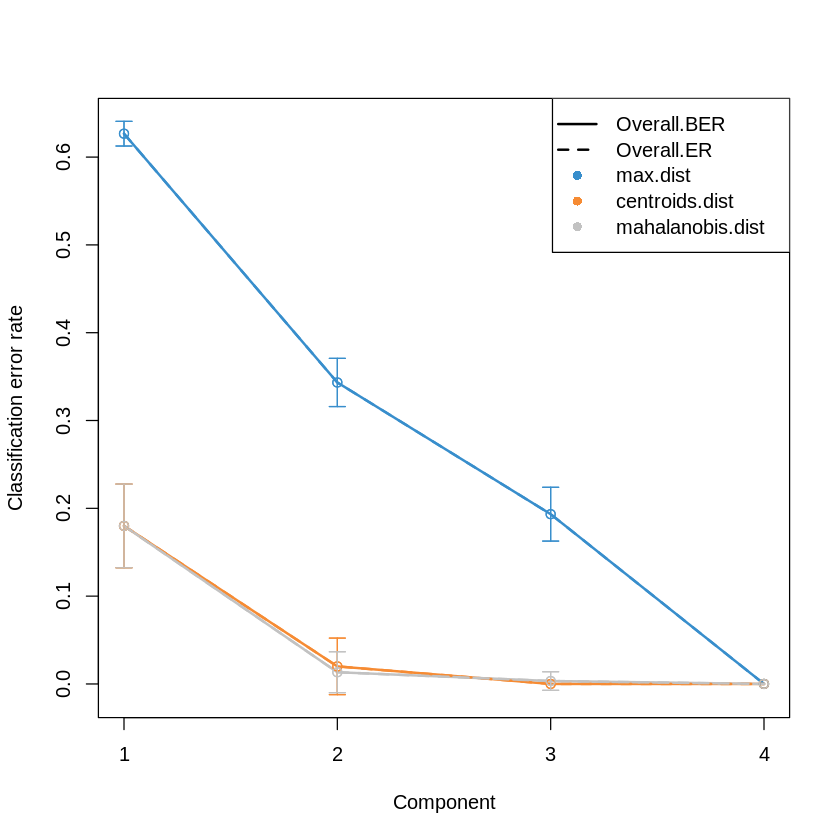

In [ ]:
plot(perf.diablo)


Here all BER (balanced error rate) distances seem to reach their minimum / plateau at ncomp=4, and do not seem to change further. Therefore, we will use ncomp=2 as an optimal number of PLS components to keep in the further downstream analysis. To keep more PLS components would lead to a risk of overfitting the model, therefore we should keep as few PLS components as possible. In the BER figure, different colors correspond to different distances between the  samples projected on the reference during the cross-validation procedure. In every cross-validation iteration we decide which sample belongs to which ECOTYOE, and the distance measuring the proximity to a cluster can be max.dist, mahalanobis.dist and centroids.dist. After a test sample has been assigned to one of the reference clusters, and got a predicted label, it is validated against its true label, and the accuracy (or error rate in this case) demonstrate how generalizable the model is.

After we have selected the optimal number of PLS components, let us now perform tuning of the model which implies selecting most informative variables in all layers of the data. For this purpose, we will again need to provide the design matrix which shows a-priori correlation between the phenotype of interest and the OMICs. We assumed a weak correlation, but one can in principle play with this parameter and find out how it influences the final result. Further, we will concentrate on the first two PLS components based on the output of “perf”-function above.

In [ ]:
# set the optimal ncomp value
ncomp = perf.diablo$choice.ncomp$WeightedVote["Overall.BER", "centroids.dist"] 
# show the optimal choice for ncomp for each dist metric
perf.diablo$choice.ncomp$WeightedVote 

,max.dist,centroids.dist,mahalanobis.dist
Overall.ER,4,2,2
Overall.BER,4,2,2


In [ ]:
#this takes about 23 min to run that's why we chose smalltest keep 
test.keepX=list(
  "Proteomics_CW"=c(1:5),
  "Transcriptomics_CW"=c(1:5),
  "Transcriptomics"=c(1:5),
  "Phenomics"=c(1:5),
  "Metabolomics"=c(1:5)
)
ptm<-proc.time()
tune.omics=tune.block.splsda(X=data,Y=Ecotype,ncomp=ncomp,test.keepX=test.keepX,design=design,progressBar=FALSE,validation="Mfold",folds=2,nrepeat=5,near.zero.var=FALSE,dist = "mahalanobis.dist", BPPARAM = BPPARAM)

Design matrix has changed to include Y; each block will be
            linked to Y.


You have provided a sequence of keepX of length: 5 for block Proteomics_CW and 5 for block Transcriptomics_CW and 5 for block Transcriptomics and 5 for block Phenomics and 5 for block Metabolomics.
This results in 3125 models being fitted for each component and each nrepeat, this may take some time to run, be patient!

Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algorithm did not converge”
Warning message:
“The SGCCA algor

In [ ]:
my_time<-proc.time()-ptm
print(paste0("Thus it takes ",as.numeric(my_time["elapsed"])/3600," hour to run this piece of code"))

[1] "Thus it takes 1.09585583333333 hour to run this piece of code"


In [ ]:
tune.omics$choice.keepX

$Proteomics_CW
[1] 5 5

$Transcriptomics
[1] 1 1

$Transcriptomics_CW
[1] 4 1

$Phenomics
[1] 3 4

$Metabolomics
[1] 5 4

Now let us perform the final sPLS-DA modelling and display PCA plots and loadings. Genetic variation data is notoriously difficult to handle by traditional statistical approaches that assume normality, therefore PLS (as well as many statistical other tools) has unfortunately problems working with this type of data.

In [ ]:
list.keepX=list("Proteomics_CW"=tune.omics$choice.keepX$Proteomics_CW,"Transcriptomics_CW"=tune.omics$choice.keepX$Transcriptomics_CW,"Transcriptomics"=tune.omics$choice.keepX$Transcriptomics,"Phenomics"=tune.omics$choice.keepX$Phenomics,"Metabolomics"=tune.omics$choice.keepX$Metabolomics)
res=block.splsda(X=data,Y=Ecotype,ncomp=ncomp,keepX=list.keepX,design=design,near.zero.var=FALSE)

Design matrix has changed to include Y; each block will be
            linked to Y.



In [ ]:
selectVar(res,block='Metabolomics',comp=1)$Metabolomics$name

[1] "XG"               "RGI_branching"    "Contribution_RG"  "Pectin_HG"       
[5] "Pectin_linearity"

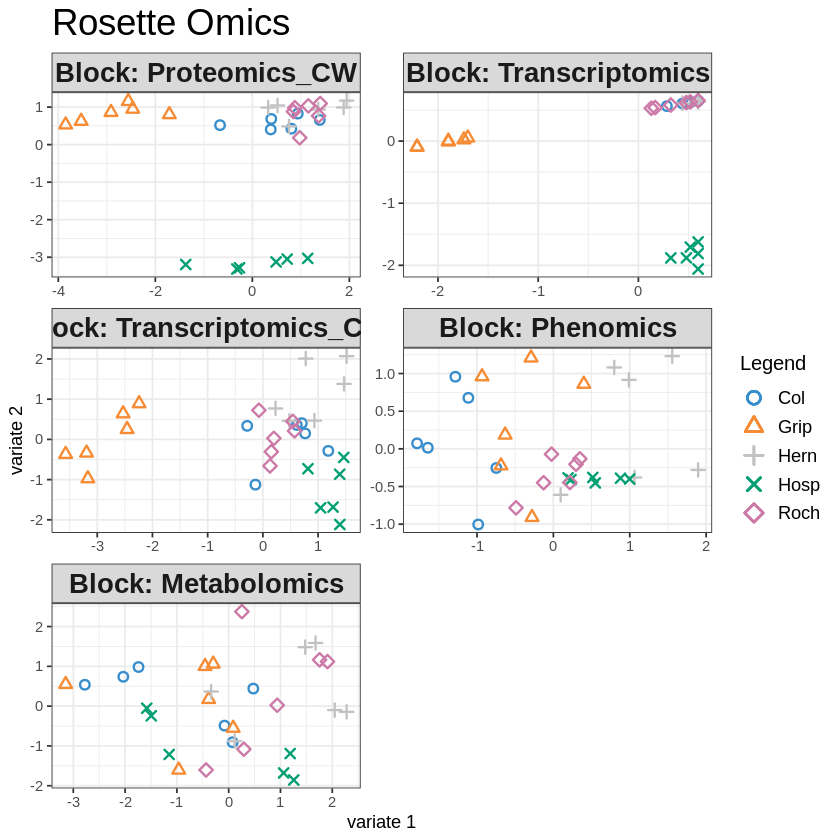

In [ ]:
plotIndiv(res,legend=TRUE,title="Rosette Omics",ellipse=FALSE,ind.names=FALSE,cex=2)

Here we can visualize the samples for the 5
OMICs using their features selected via the integration procedure. each ECOTYPE sample seem to be clearly separated for gene expressions (TRANSCRIPTOMICS AND TRANSCRIPTOMICS_CW) and perhaps PROTEOMICS_CW, while no obvious separation is present for the PHENOMICS and METABOLOMICS.

here we can see the clustering in each block  based on the ECOTYPE we can say that in transcriptomics, transcriptomics_cw and proteomics the cluster are distiguishable meaning that the ECOTYPE affects the genetic composition of the stem however for phenomics and metabolomics the cluster are mixed up meaning that we will find stems with diffrent caracterstics in the same ecotype 

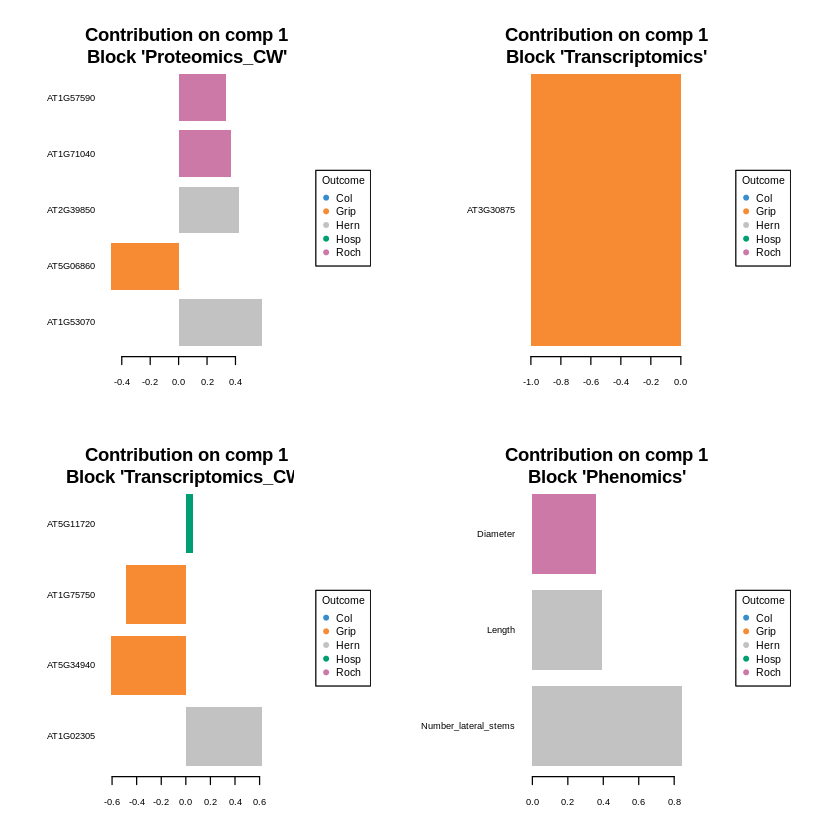

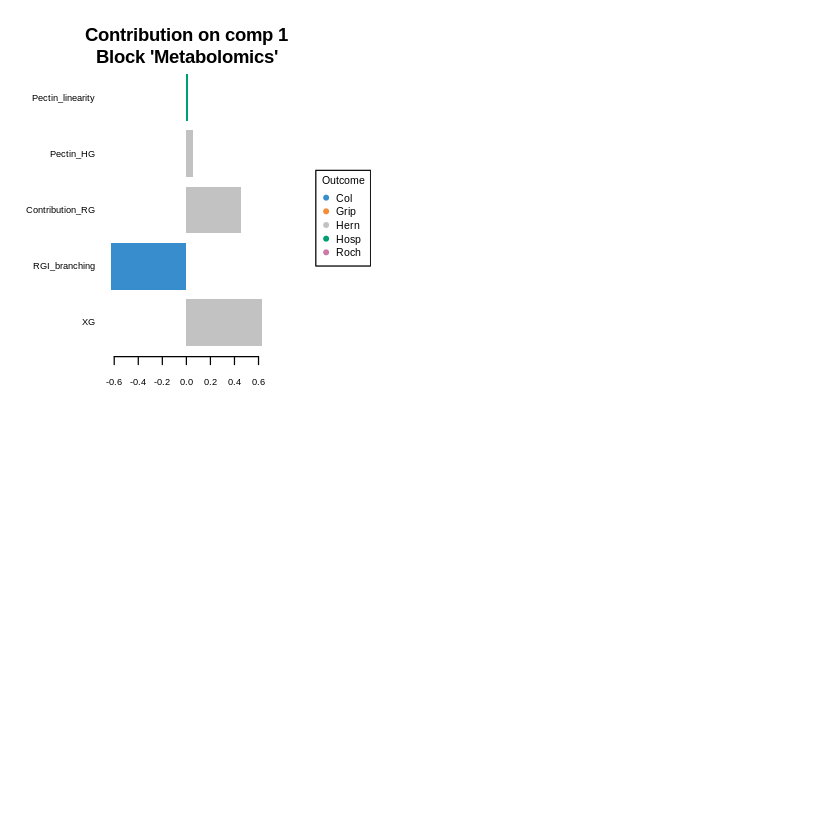

In [ ]:
plotLoadings(res,comp=1,contrib='max',method='mean')


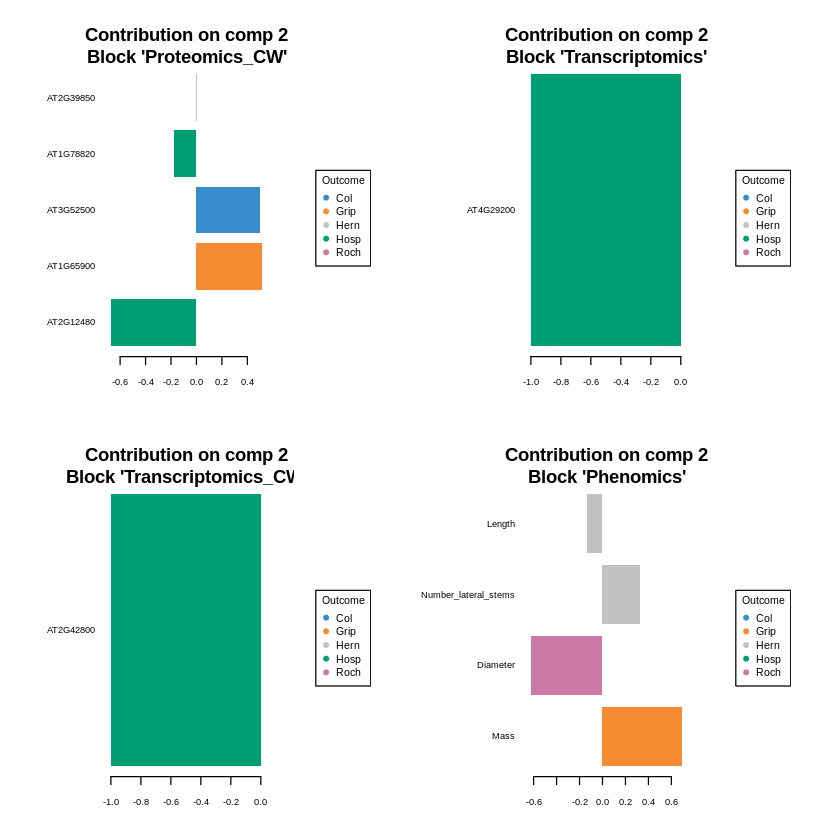

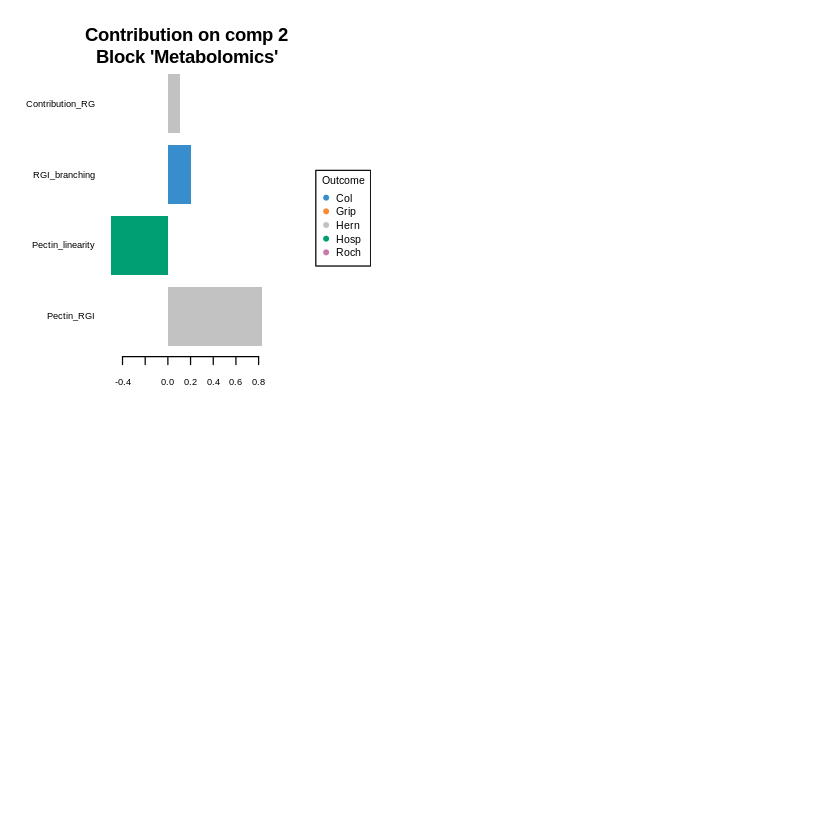

In [ ]:
plotLoadings(res,comp=2,contrib='max',method='mean')

from the loadings on each component we can see what features are driving the scattering of the samples in the plots above

Loading plots for all of our 5 blocks data to discriminate ECOTYPE. Colours indicate the ECOTYPE in which the median is maximum for each variable in each block we use it the 2 most variate componenets

Now, we will diplay the data points using PCA principal components from individual OMICs. This can be an informative way to to visualise correlation between components from different data sets. In our case TRANSCRIPTOMICS AND TRANSCRIPTOMICS_CW OMICs seem to have the strongest correlation and there's a substantial amount of correlation between both TRANCRIPTOMICS and PROTEOMICS_CW 

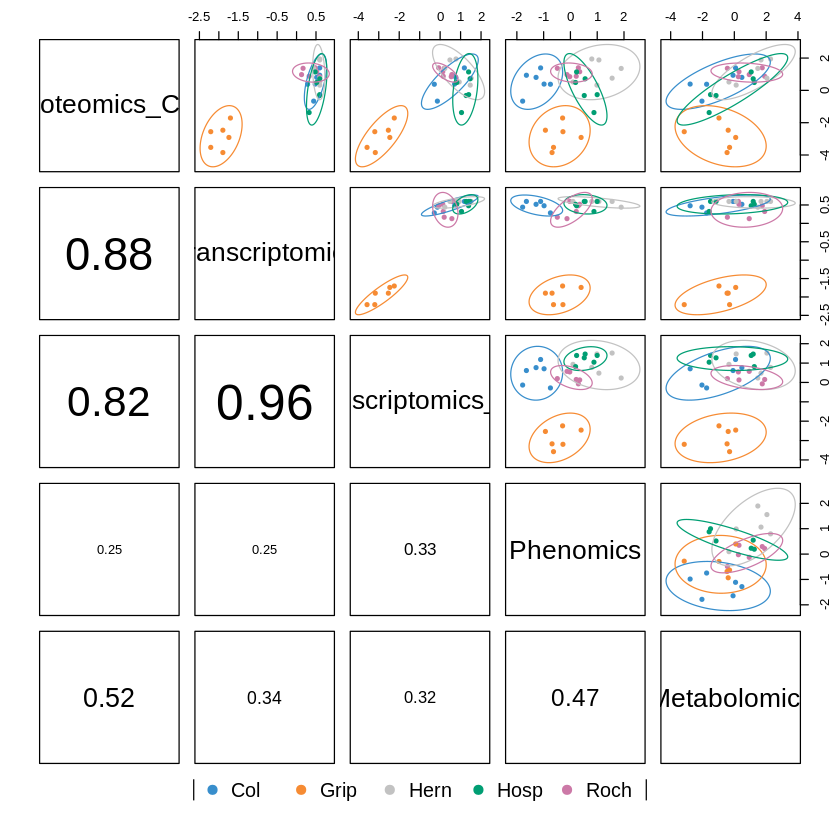

In [ ]:
plotDiablo(res,ncomp=1)

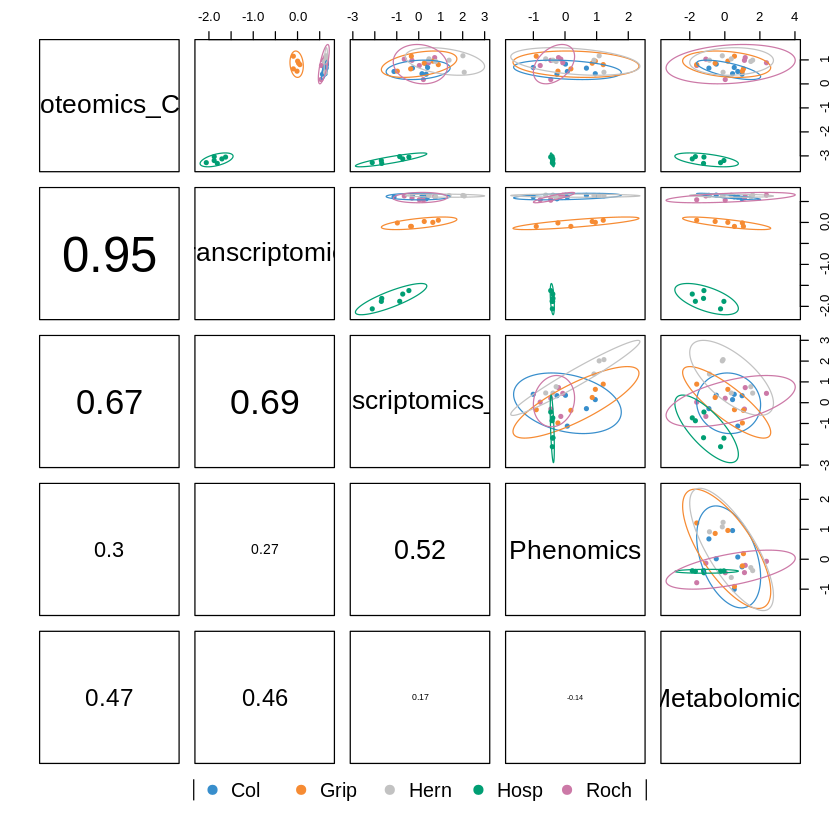

In [ ]:
plotDiablo(res,ncomp=2) 

Graphical representation of the sparse multi-block partial least squares discriminant analysis (MB-PLS-DA) analysis discriminating the stem samples of Col, Grip, hern Roch. The plotDIABLO shows the correlation inside each block pair
we can also get another look on the clusters and how do they appear in each block of data

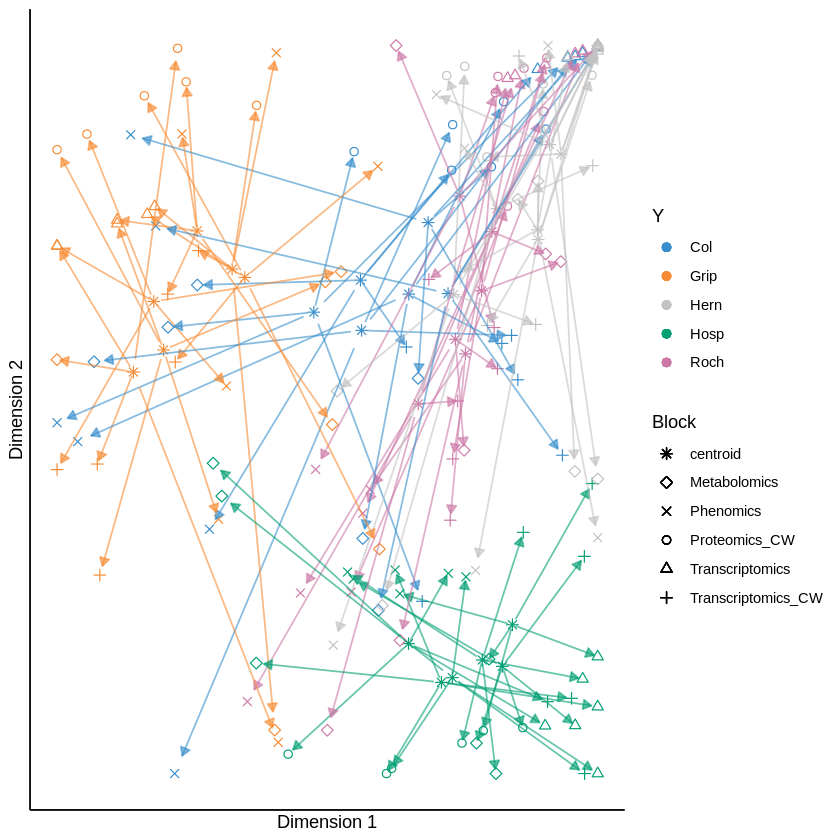

In [ ]:
plotArrow(res,ind.names=FALSE,legend=TRUE,title="Rosette Omics Integration")

The Arrow Plot can be viewed as a Consensus Plot between all the OMICs on the sample level, the X and Y coordiantes correspond to common latent variables between the OMICs, i.e. we projected all the OMICs into some common latent space where they loose information about their technological origin and hence can be superimposed onto each other.

Now we will display the so-called Correlation Circle Plot, where the top loadings variables from each of the OMICs are superimposed. Clustering of variables around the poles of the circle implies strong correlation between the variables from different OMICs. Variables on the opposite poles of the correlation circle plot imply strong anti-correlation. While the Arrow Plot serves as a main integrative OMICs visualization on sample level, the Correlation Circle Plots can be considered as a main visualization of OMICs integration on the feature level.

Warning message in plotVar(res, var.names = TRUE, style = "ggplot2", legend = TRUE, :
“We detected negative correlation between the variates of some blocks, which means that some clusters of variables observed on the correlation circle plot are not necessarily positively correlated.”


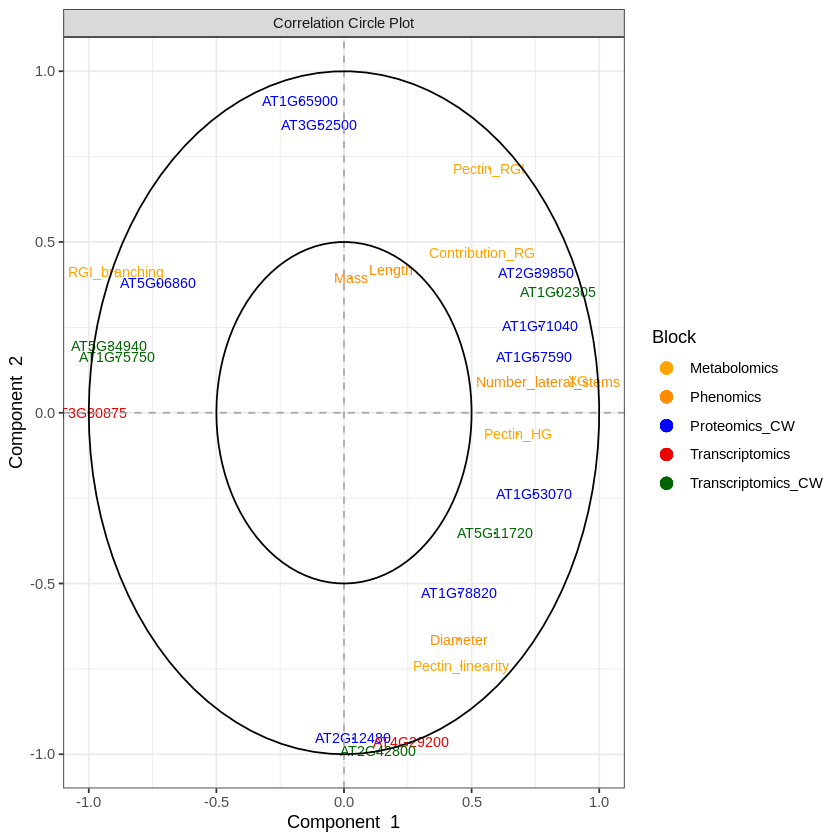

In [ ]:
plotVar(res,var.names=TRUE,style='ggplot2',legend=TRUE,cex=c(3,3,3,3,3),col=c('blue','red2',"darkgreen","darkorange","orange"))

For further visualization of the results of OMICs integration, we will calculate the so-called Circos Plot that diaplays correlations between features from different OMICs dat sets. Please note that here for the Circos Plot, as well as for the Correlation Circle Plot above, the features were selected simultaneously from all the OMICs when performing integration, i.e. they are not equavivalent to those obtained from each individual OMIC separately.

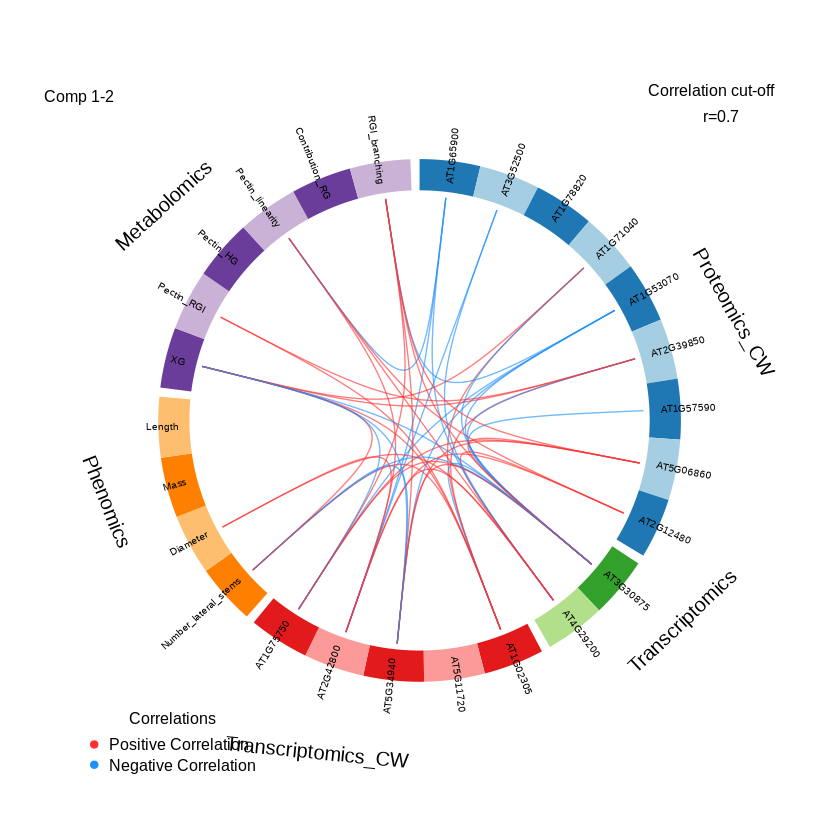

In [ ]:
circosPlot(res,cutoff=0.7,line=FALSE,size.variables=0.5)


For further visualization of the results of OMICs integration, we will calculate the so-called Circos Plot that diaplays correlations between features from different OMICs dat sets. Please note that here for the Circos Plot, as well as for the Correlation Circle Plot above, the features were selected simultaneously from all the OMICs when performing integration, i.e. they are not equavivalent to those obtained from each individual OMIC separately.

Correlation network is another handy way to demostrate correlations between top loadings of the OMICs data sets in a pairwise fashion. Here we can choose a pair of OMICs and make a network comprising most informative features (selected via the integration) from both OMICs. The color of the edges corresponds to the strength of the correlation between the OMICs. One can use a “cutoff” paremeter to display one the the edges above a specified threshold.

The key insight provided by networks are the sub-networks (or cliques) that can be seen. These clusters often highlight specific structures between variables. The colour of each line indicates the nature of the correlation between each feature.

the clour of each node represents the block or data set or omic

we can do more than 2 at a time but we loose most visibility 

some comobos of block doesn't work toghther for exp we cannot do block num 2 with its self (even if we could it would be meaningless) , furthermore some combos lack enough correlation to be displayed  

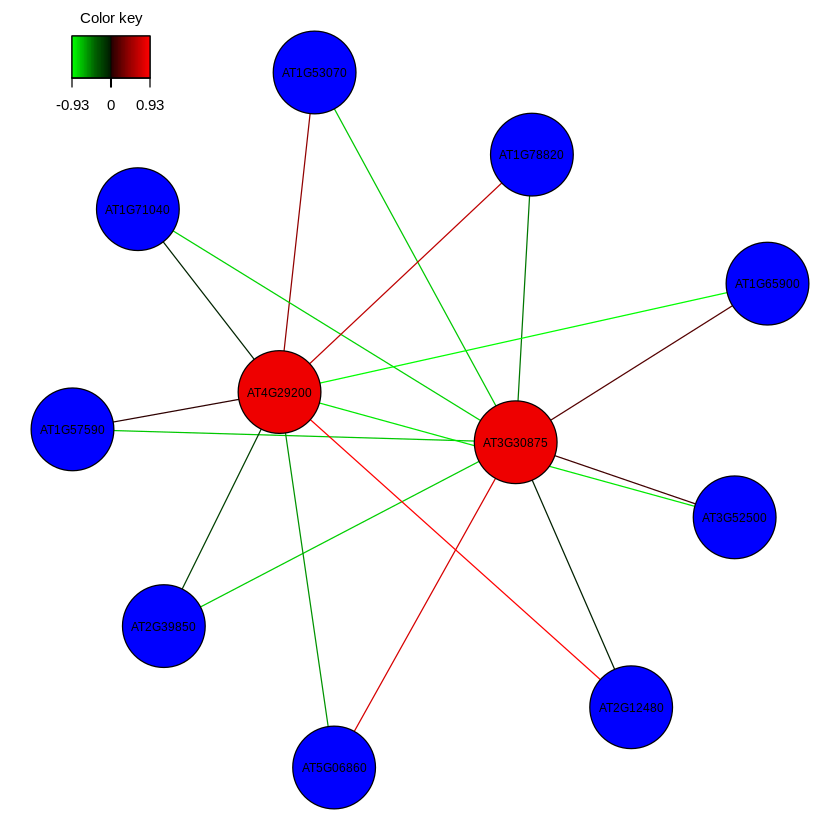

In [ ]:
network(res,blocks=c(1,2),cex.node.name=0.6,color.node=c('blue','red2'),breaks=NULL)

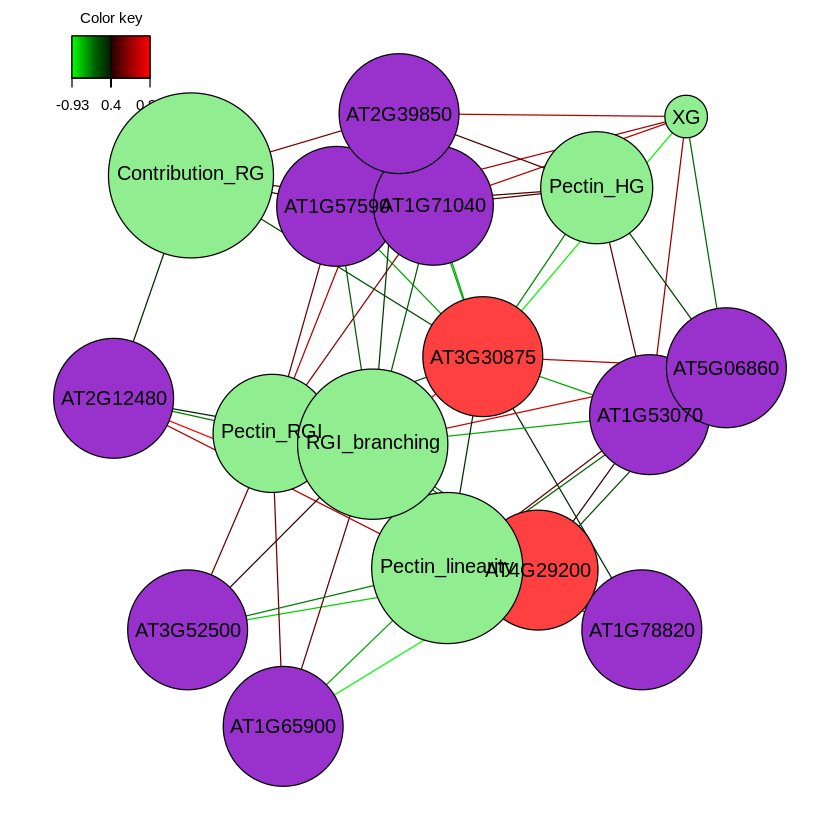

In [ ]:
network(res, blocks = c(1,2,5),color.node = c('darkorchid', 'brown1', 'lightgreen'), cutoff = 0.4)

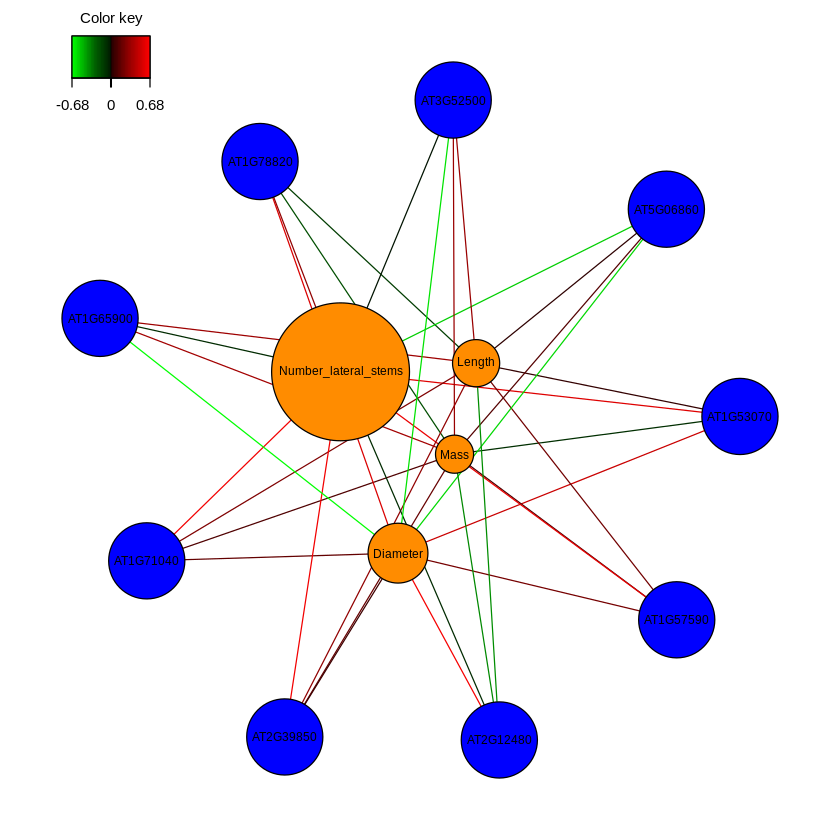

In [ ]:
network(res,blocks=c(1,4),cex.node.name=0.6,color.node=c('blue','darkorange'),breaks=NULL)

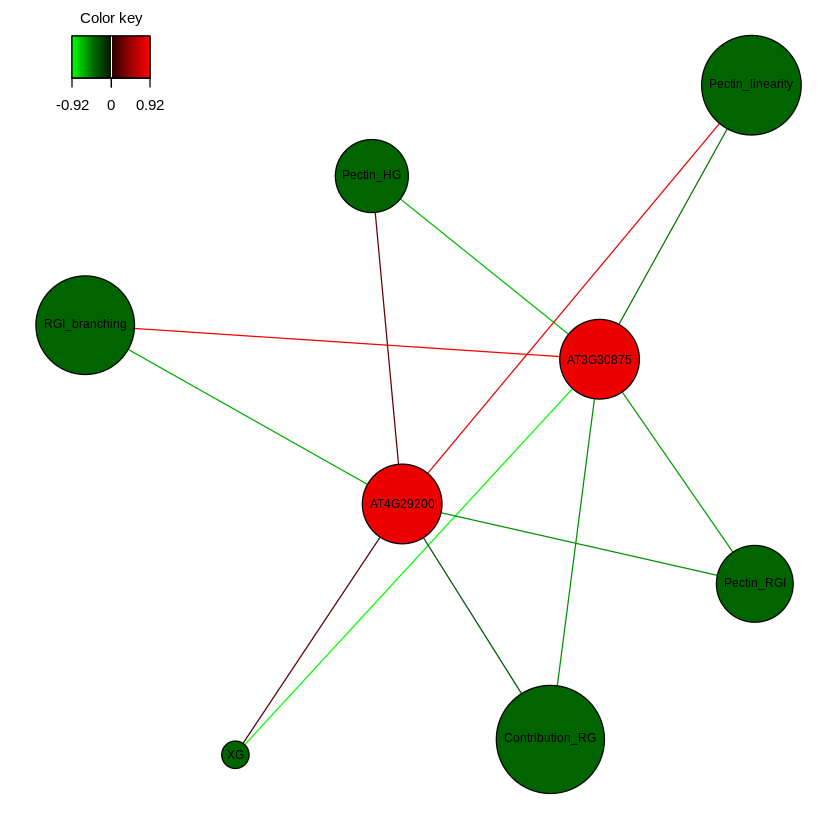

In [ ]:
network(res,blocks=c(2,5),cex.node.name=0.6,color.node=c('red2','darkgreen'),breaks=NULL)

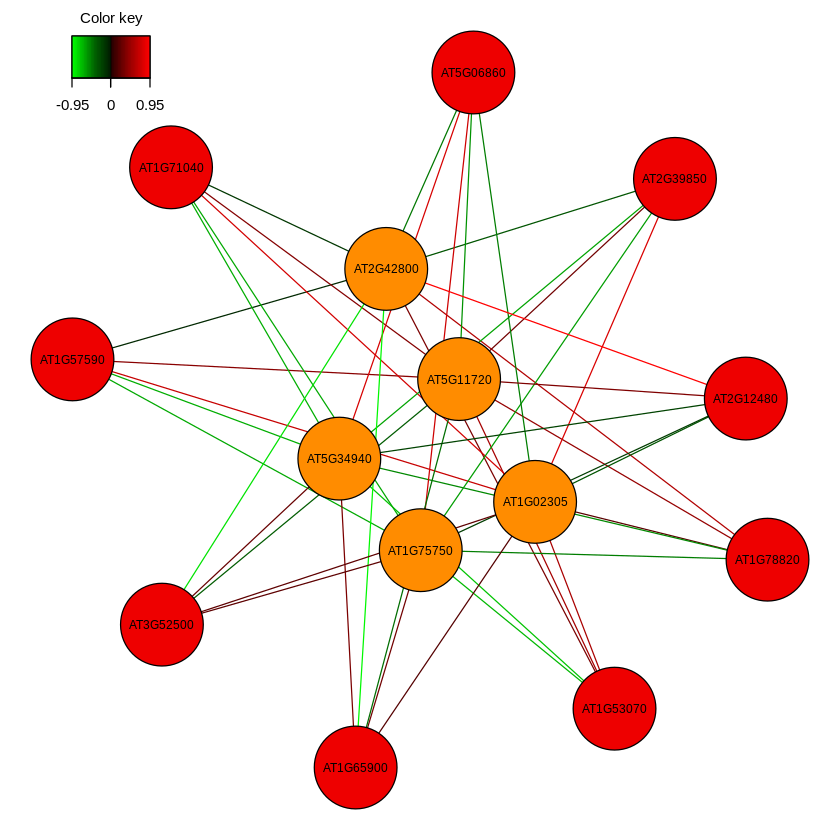

In [ ]:
network(res,blocks=c(1,3),cex.node.name=0.6,color.node=c('red2','darkorange'),breaks=NULL)

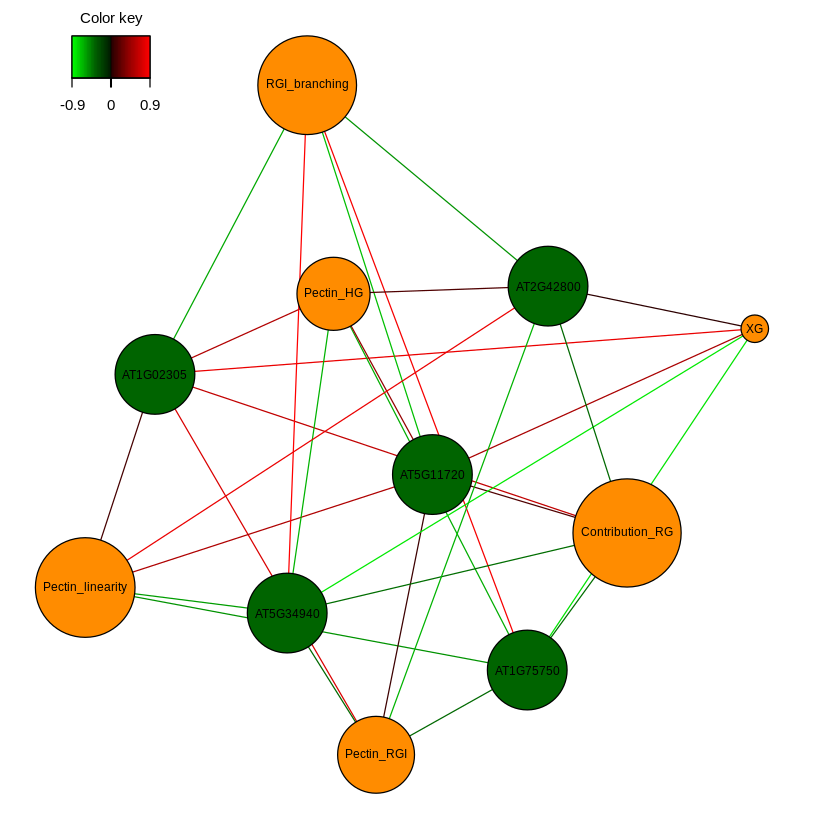

In [ ]:
network(res,blocks=c(3,5),cex.node.name=0.6,color.node=c('darkgreen','darkorange'),breaks=NULL)

Finally, the correlation heatmap displays strongly correlated blocks of Our 5 OMICS. 

Here the color of a cell on a heatmap demonstrates abundance of the feature in the sample that are “coordinates” of the cell. 

 clustered image map representing the multi-omics profiles for each sample discriminated by the ECOTYPE . The levels of blue (lower values) and red (higher values) denote scaled values for each variable. Note that colors are scaled per line.


trimming values to [-3, 3] range for cim visualisation. See 'trim' arg in ?cimDiablo


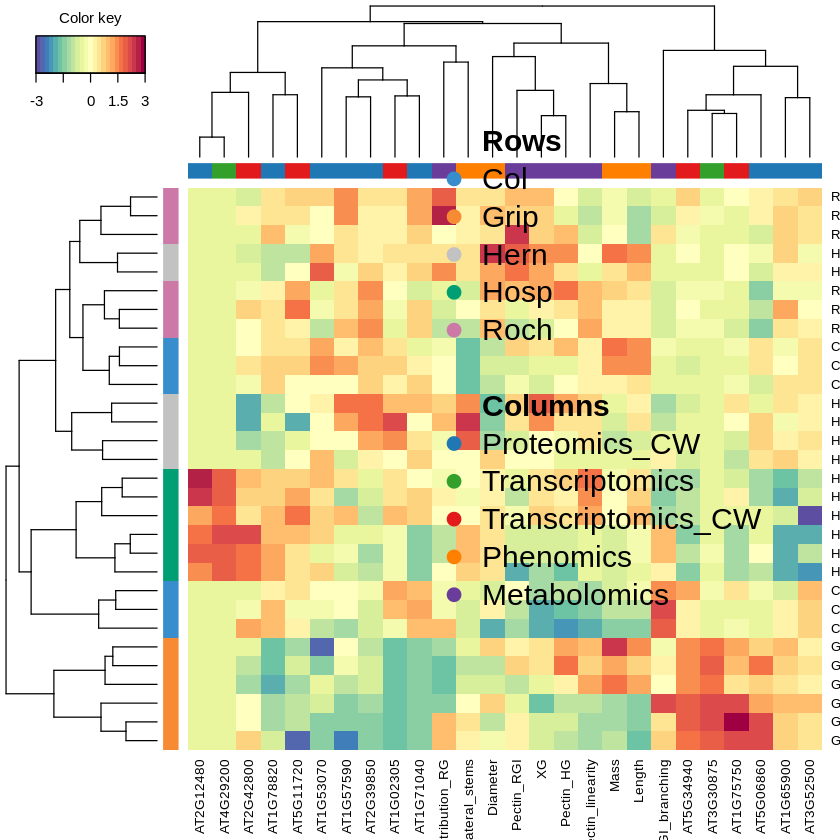

In [ ]:
cimDiablo(res,margins=c(5,1))

###Predict Genetic_cluster from OMICs Integration
